# Churn Modelling Data Analysis

## Customer Demographics

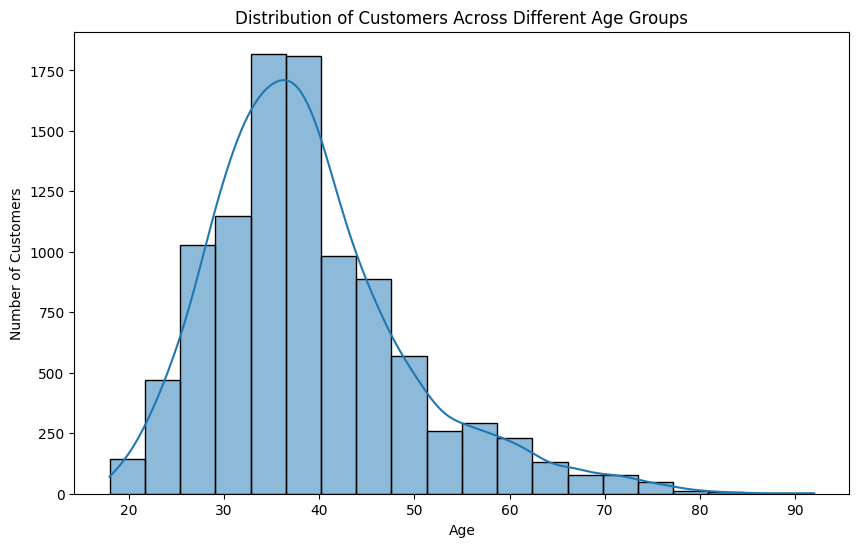

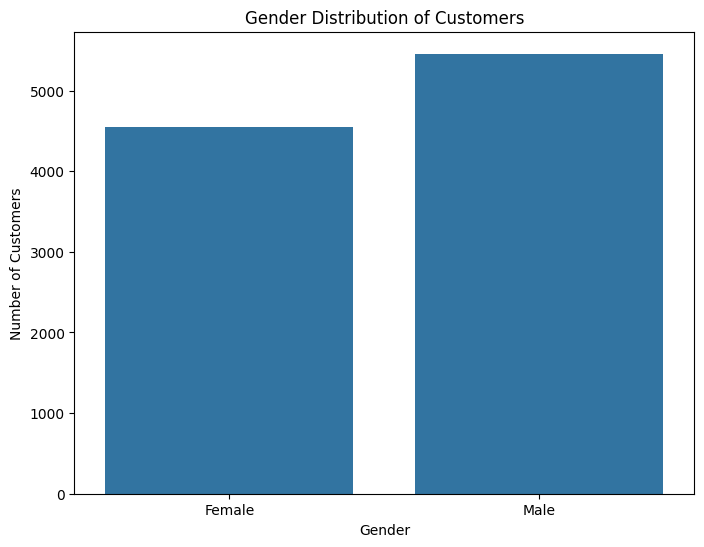

In [8]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = '/content/P3- Churn-Modelling Data.xlsx'
df = pd.read_excel(file_path, sheet_name='data')

# Distribution of customers across different age groups
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Customers Across Different Age Groups')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

# Gender distribution of customers
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()


## Churn Analysis

Percentage of customers who have churned: 20.37%


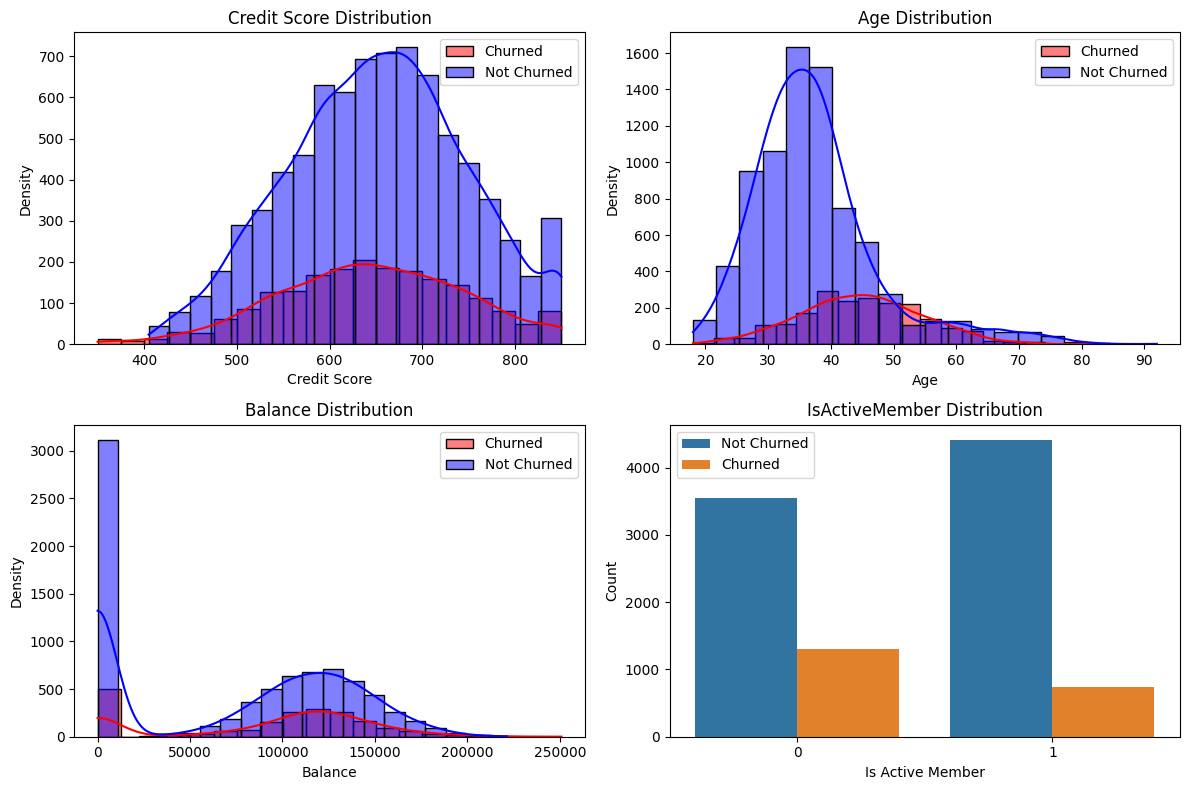

In [2]:

# Percentage of customers who have churned
churn_percentage = df['churned'].mean() * 100
print(f'Percentage of customers who have churned: {churn_percentage:.2f}%')

# Main reasons for customer churn
# For simplicity, we'll consider factors like CreditScore, Age, Balance, and IsActiveMember as potential reasons for churn.
churned_customers = df[df['churned'] == 1]
non_churned_customers = df[df['churned'] == 0]

# Analyzing patterns or trends among customers who have churned
plt.figure(figsize=(12, 8))

# Credit Score distribution
plt.subplot(2, 2, 1)
sns.histplot(churned_customers['CreditScore'], bins=20, kde=True, color='red', label='Churned')
sns.histplot(non_churned_customers['CreditScore'], bins=20, kde=True, color='blue', label='Not Churned')
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Density')
plt.legend()

# Age distribution
plt.subplot(2, 2, 2)
sns.histplot(churned_customers['Age'], bins=20, kde=True, color='red', label='Churned')
sns.histplot(non_churned_customers['Age'], bins=20, kde=True, color='blue', label='Not Churned')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()

# Balance distribution
plt.subplot(2, 2, 3)
sns.histplot(churned_customers['Balance'], bins=20, kde=True, color='red', label='Churned')
sns.histplot(non_churned_customers['Balance'], bins=20, kde=True, color='blue', label='Not Churned')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.legend()

# IsActiveMember distribution
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='IsActiveMember', hue='churned')
plt.title('IsActiveMember Distribution')
plt.xlabel('Is Active Member')
plt.ylabel('Count')
plt.legend(['Not Churned', 'Churned'])

plt.tight_layout()
plt.show()


## Product Usage

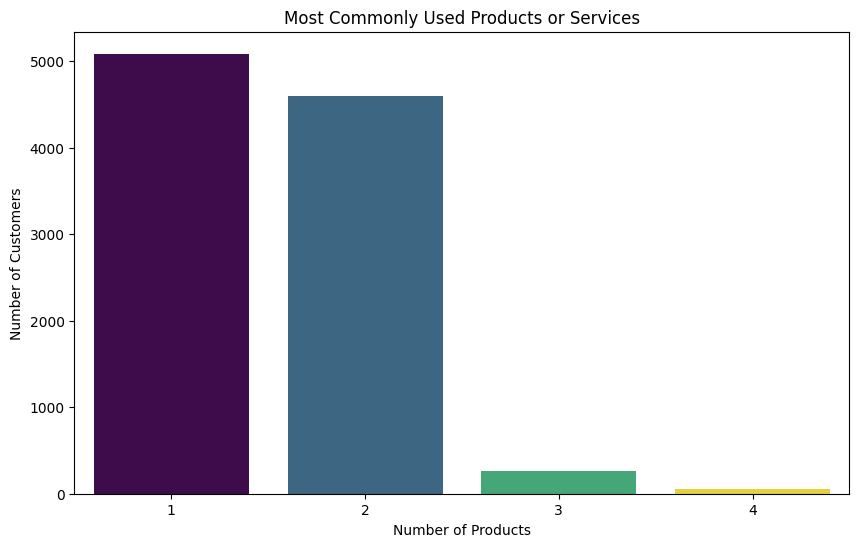

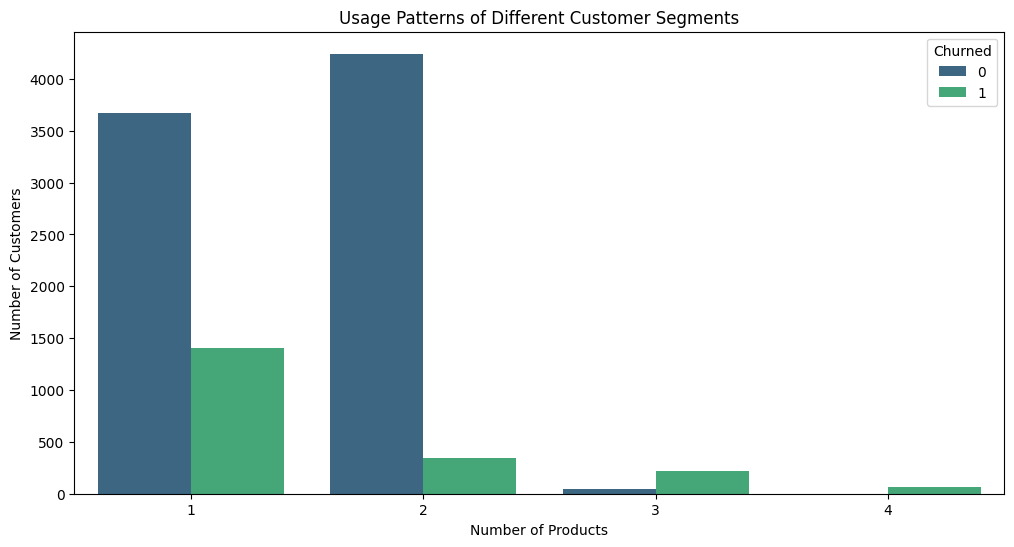

In [13]:
# Most commonly used products or services
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NumOfProducts', palette='viridis', hue='NumOfProducts', legend=False)
plt.title('Most Commonly Used Products or Services')
plt.xlabel('Number of Products')
plt.ylabel('Number of Customers')
plt.show()

# Analyze the usage patterns of different customer segments
# We'll segment by churned status and number of products
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='NumOfProducts', hue='churned', palette='viridis')
plt.title('Usage Patterns of Different Customer Segments')
plt.xlabel('Number of Products')
plt.ylabel('Number of Customers')
plt.legend(title='Churned', loc='upper right')
plt.show()


## Financial Analysis

Average account balance of customers: 76485.89


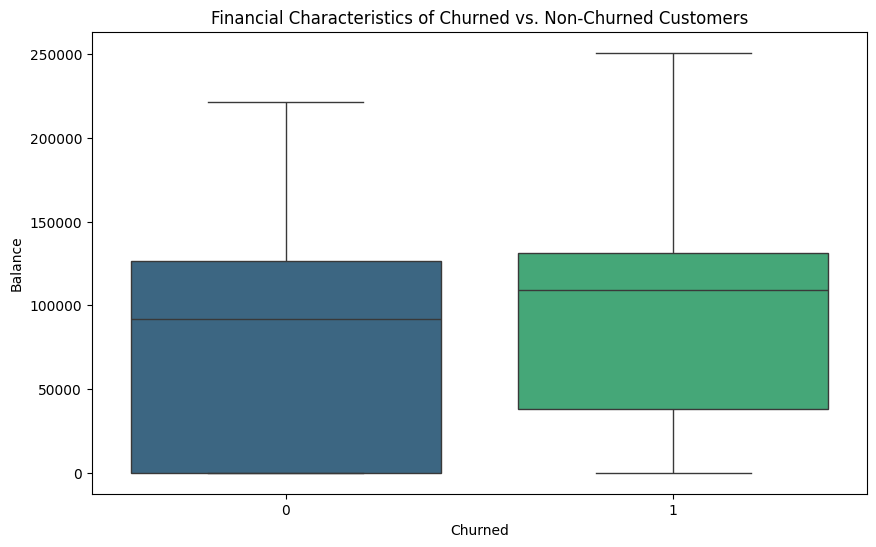

In [11]:
# Average account balance of customers
average_balance = df['Balance'].mean()
print(f'Average account balance of customers: {average_balance:.2f}')

#  Comparison of financial characteristics of churned vs. non-churned customers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Balance', x='churned', hue='churned', palette='viridis', dodge=False)
plt.title('Financial Characteristics of Churned vs. Non-Churned Customers')
plt.xlabel('Churned')
plt.ylabel('Balance')
plt.legend([],[], frameon=False)  # Hides the legend
plt.show()

## Predictive Modeling

In [5]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Preparing the data for modeling
X = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'churned'])
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to dummy variables
y = df['churned']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Developing the predictive model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Making predictions and evaluating the model
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2416
           1       0.54      0.20      0.29       584

    accuracy                           0.81      3000
   macro avg       0.69      0.58      0.59      3000
weighted avg       0.78      0.81      0.77      3000

[[2318   98]
 [ 468  116]]
